In [1]:
from src.processing import RoiAnalyser

In [2]:
DATA_DIR = "data/#2451333014_ZProj_B IVA76"  # input data directory path
OUTPUT_DIR = "out"  # output results directory path
PLOT = True  # whether to show plots
MODALITIES = ("dapi", "tritc", "gfp")

SIZE_THRESHOLD = 3000  # size threshold for filtering clusters

Loaded files:
  dapi: 'E3ROI3_-2_2_1_ZProj[Confocal DAPI 405,442]_001.tif'
  gfp: 'E3ROI3_-2_3_1_ZProj[Confocal GFP 472,520]_001.tif'
  tritc: 'E3ROI3_-2_4_1_ZProj[Confocal TRITC 556,600]_001.tif'

Analysing: E3ROI3, 
Step 1: Preprocessing DAPI image...
Step 2: Finding clusters...
  Found 3 clusters


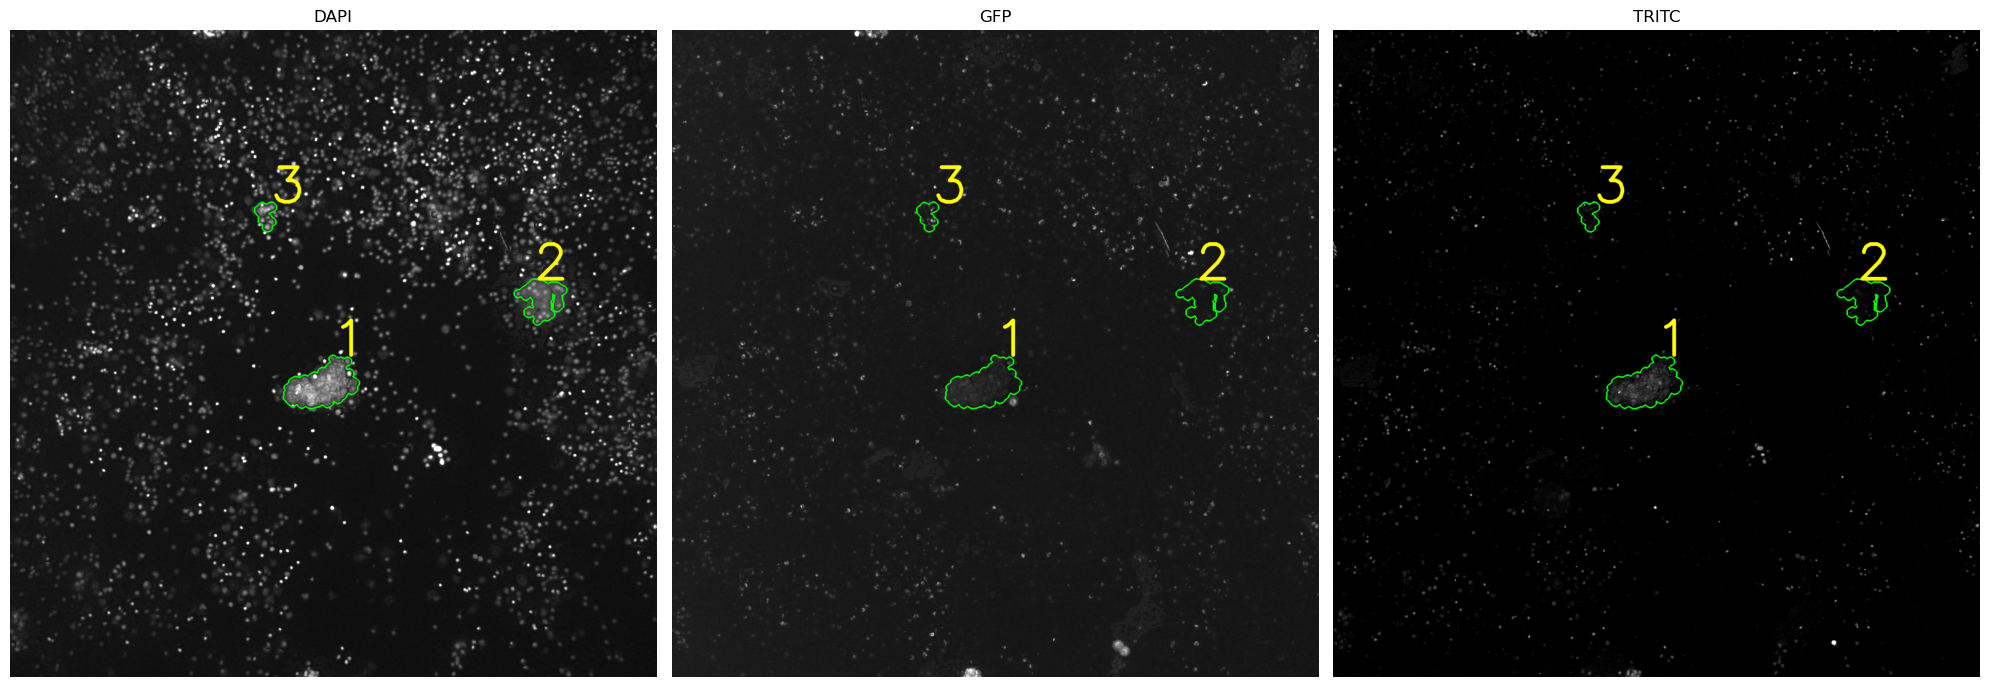

Step 3: Building GFP and TRITC histograms for clusters...


In [3]:
roi_name = "E3ROI3"  # change me
analyser = RoiAnalyser(DATA_DIR, roi_name, OUTPUT_DIR, PLOT, SIZE_THRESHOLD, MODALITIES)

z = ""  # set to the required Z or leave empty ""
clusters, channel_histograms = analyser.run_analysis(z)

(**OPTIONAL**) Run the histogram analysis for different Z

In [ ]:
z = "Z6"  # change me

print("Step 4: Repeat for additional Zs...")
channels = analyser.repeat_for_additional_images(z, clusters, channel_histograms)

Save the calculated histograms as `.csv` files

In [4]:
# save histograms
print("Step 5: Saving histograms")
out_files = analyser.save_histogram(channel_histograms)

Step 5: Saving histograms

Saving histogram data for ROI: E3ROI3
  Successfully saved GFP histogram data to 'out/E3ROI3/E3ROI3_GFP.csv'
  Successfully saved TRITC histogram data to 'out/E3ROI3/E3ROI3_TRITC.csv'


Calculate apopnec ratio

In [5]:
# change the `start_row`
params = {
    "GFP": {"file": out_files["GFP"], "start_row": 72},
    "TRITC": {"file": out_files["TRITC"], "start_row": 72},
}

print("Step 6: Calculate apopnec ratio...")
for name, args in params.items():
    print(f"  For {name}", end=", ")
    analyser.apopnec_ratio(file=args["file"], start_row=args["start_row"])

print("------------------")
print("Done :)")

Step 6: Calculate apopnec ratio...
  For GFP, saved as 'out/E3ROI3/E3ROI3_GFP.csv'
  For TRITC, saved as 'out/E3ROI3/E3ROI3_TRITC.csv'
------------------
Done :)
